In [94]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt


In [95]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
img = cv2.imread("C:/Users/Omdes/Sports Person CLassifier/model/dataset/Ma_Long/Ma Long_19.jpg")


In [97]:
img.shape

(422, 759, 3)

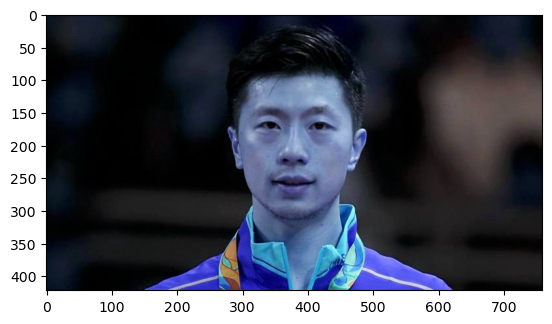

In [98]:
plt.imshow(img)

In [99]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(422, 759)

In [100]:
gray

array([[22, 22, 22, ...,  2,  2,  2],
       [23, 23, 23, ...,  2,  2,  2],
       [24, 24, 24, ...,  2,  2,  2],
       ...,
       [19, 20, 20, ...,  5,  5,  5],
       [19, 20, 20, ...,  4,  4,  4],
       [19, 20, 20, ...,  3,  3,  3]], dtype=uint8)

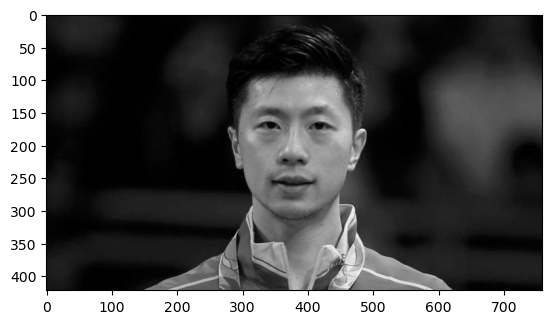

In [101]:
plt.imshow(gray,cmap ='gray')

In [102]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\Omdes\Sports Person CLassifier\model\OpenCV\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\Omdes\Sports Person CLassifier\model\OpenCV\haarcascades\haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[267,  81, 234, 234]], dtype=int32)

In [103]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(267), np.int32(81), np.int32(234), np.int32(234))

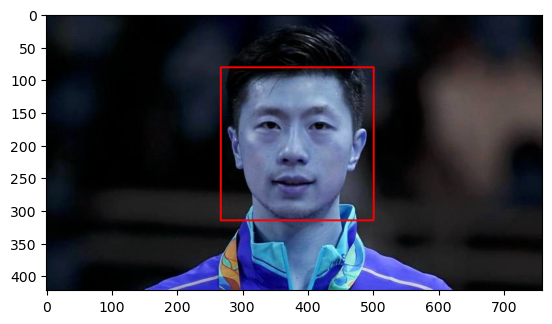

In [104]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

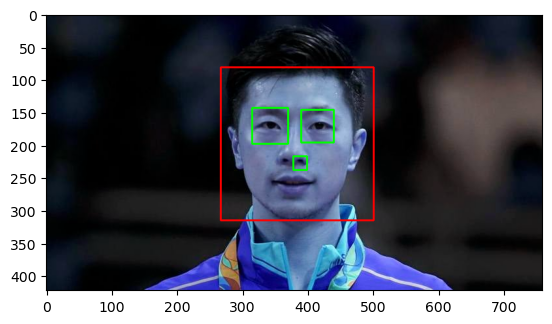

In [105]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()

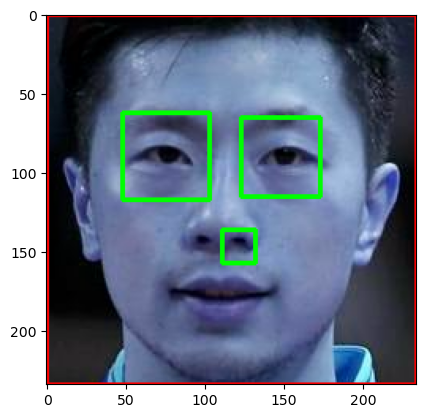

In [106]:
plt.imshow(roi_color,cmap='gray')

In [107]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

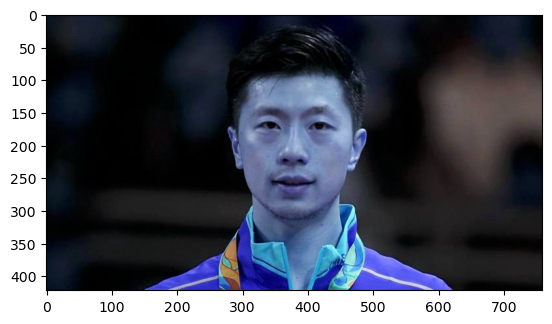

In [108]:
original_image = cv2.imread("C:/Users/Omdes/Sports Person CLassifier/model/dataset/Ma_Long/Ma Long_19.jpg")
plt.imshow(original_image)

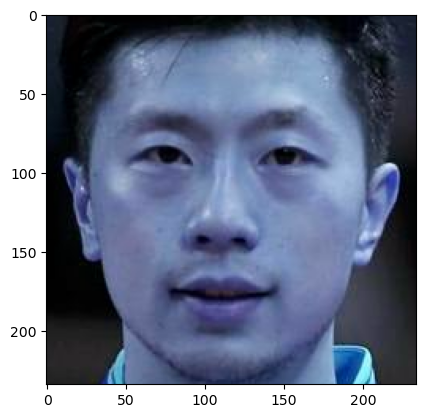

In [109]:
cropped_image = get_cropped_image_if_2_eyes("C:/Users/Omdes/Sports Person CLassifier/model/dataset/Ma_Long/Ma Long_19.jpg")
plt.imshow(cropped_image)

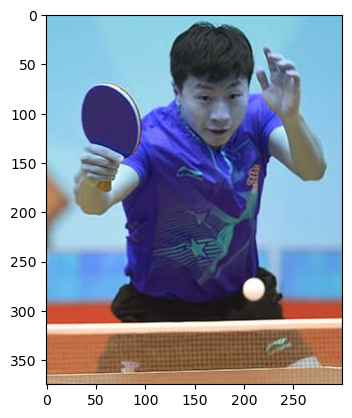

In [110]:
original_image_1 = cv2.imread(r"C:\Users\Omdes\Sports Person CLassifier\model\test_images\000024.jpg")
plt.imshow(original_image_1)

In [111]:
path_to_data = r"C:\Users\Omdes\Sports Person CLassifier\model\dataset"
path_to_cr_data =r"C:\Users\Omdes\Sports Person CLassifier\model\dataset\cropped"

In [112]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [113]:
img_dirs

['C:\\Users\\Omdes\\Sports Person CLassifier\\model\\dataset\\cropped',
 'C:\\Users\\Omdes\\Sports Person CLassifier\\model\\dataset\\Fan_Zhendong',
 'C:\\Users\\Omdes\\Sports Person CLassifier\\model\\dataset\\Ma_Long',
 'C:\\Users\\Omdes\\Sports Person CLassifier\\model\\dataset\\Timo_Boll',
 'C:\\Users\\Omdes\\Sports Person CLassifier\\model\\dataset\\Truls_Moregard']

In [114]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [115]:
cropped_image_dirs= []
TT_file_name_dict = {}
for img_dir in img_dirs:
    count =1
    TT_name = os.path.basename(img_dir)
    print(TT_name)

    TT_file_name_dict[TT_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + TT_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder :" , cropped_folder)
            cropped_filename = TT_name + str(count) + ".png"
            cropped_filepath = cropped_folder + "/" + cropped_filename
            cv2.imwrite(cropped_filepath,roi_color)
            TT_file_name_dict[TT_name].append(cropped_filepath)
            count+=1
            
            
            

cropped
Fan_Zhendong
Generating cropped images in folder : C:\Users\Omdes\Sports Person CLassifier\model\dataset\croppedFan_Zhendong
Ma_Long
Generating cropped images in folder : C:\Users\Omdes\Sports Person CLassifier\model\dataset\croppedMa_Long
Timo_Boll
Generating cropped images in folder : C:\Users\Omdes\Sports Person CLassifier\model\dataset\croppedTimo_Boll
Truls_Moregard
Generating cropped images in folder : C:\Users\Omdes\Sports Person CLassifier\model\dataset\croppedTruls_Moregard


In [116]:
import pywt

In [117]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

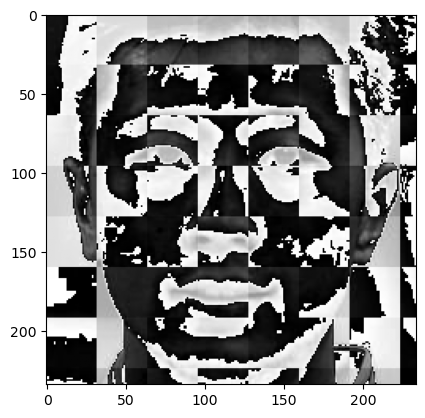

In [118]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [119]:
class_dict = {}
count = 0
for TT_name in TT_file_name_dict.keys():
    class_dict[TT_name] = count
    count +=1
class_dict

{'cropped': 0,
 'Fan_Zhendong': 1,
 'Ma_Long': 2,
 'Timo_Boll': 3,
 'Truls_Moregard': 4}

In [169]:
X = []
y = []

for TT_name, training_files in TT_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        # resize raw image
        scalled_raw_img = cv2.resize(img, (32, 32))

        # wavelet transform
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))

        # combine raw + wavelet features
        combined_img = np.vstack((
            scalled_raw_img.reshape(32*32*3, 1),
            scalled_img_har.reshape(32*32, 1)
        ))

        X.append(combined_img)
        y.append(class_dict[TT_name])


In [170]:
len(X)

118

In [171]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(118, 4096)

In [172]:
X[0]

array([ 20.,  28.,  26., ..., 247., 184., 243.])

In [173]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [174]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler' , StandardScaler()) , ('svc' , SVC(kernel = 'rbf' ,C =10))])

In [175]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [176]:
pipe.score(X_test,y_test)

0.8666666666666667

In [177]:
len(X_test)

30

In [161]:
##GridSearchCv
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [190]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma = 'auto' , probability = True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf' , 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' :{
        'model' : LogisticRegression(solver = 'liblinear' , multi_class = 'auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [192]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

    

C:\saikii\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\saikii\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\saikii\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\saikii\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will alwa

,model,best_score,best_params
0,svm,0.828758,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.762092,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.840523,{'logisticregression__C': 1}


In [193]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [198]:
best_estimators['svm'].score(X_test,y_test)

0.8

In [199]:
best_estimators['random_forest'].score(X_test,y_test)

0.7333333333333333

In [200]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7333333333333333

In [201]:
best_clf = best_estimators['svm']

In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[9, 0, 2, 0],
       [2, 7, 0, 0],
       [0, 0, 4, 1],
       [1, 0, 0, 4]])

Text(95.72222222222221, 0.5, 'Truth')

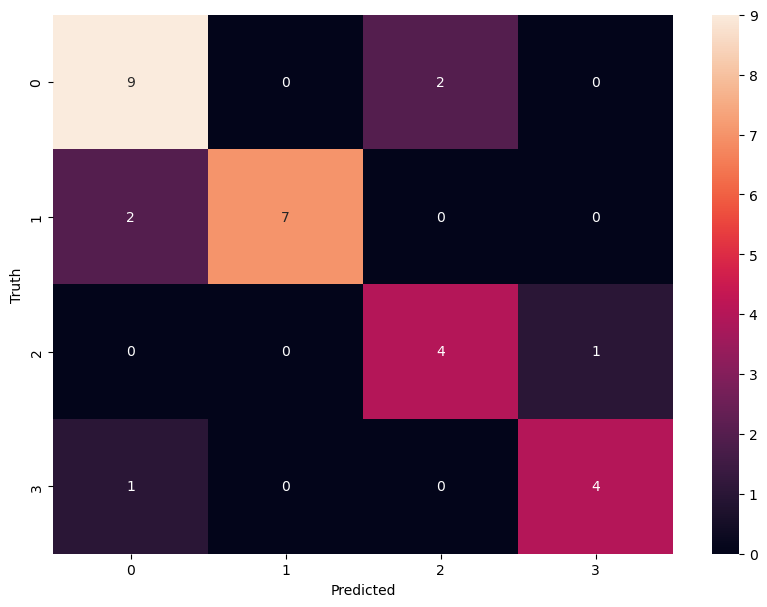

In [203]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [204]:
class_dict

{'cropped': 0,
 'Fan_Zhendong': 1,
 'Ma_Long': 2,
 'Timo_Boll': 3,
 'Truls_Moregard': 4}

In [207]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [209]:
import json
with open('class_directionary.json','w') as f:
    f.write(json.dumps(class_dict))